In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
import sys
sys.path.append("…/…/")

In [0]:
from fastai.tabular import *

In [0]:
import pandas as pd

In [0]:
df_1 = pd.read_csv('data/train.csv')
df_2 = pd.read_csv('data/validation_set.csv')

In [0]:
df = pd.concat([df_1, df_2], axis = 0)

In [0]:
df_test = pd.read_csv('data/test.csv')

In [0]:
df.to_csv('data/df.csv', index = False)

In [0]:
path = 'data'

In [0]:
procs = [Categorify, Normalize]

In [0]:
valid_idx = range(len(df)- len(df_2), len(df))

In [12]:
df.columns

Index(['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'TARGET'], dtype='object')

In [13]:
df.dtypes

S1        int64
C1        int64
S2        int64
C2        int64
S3        int64
C3        int64
S4        int64
C4        int64
S5        int64
C5        int64
TARGET    int64
dtype: object

In [0]:
dep_var = 'TARGET'

In [0]:
cat_vars = ['S1', 'S2', 'S3', 'S4', 'S5']
cont_vars = ['C1', 'C2', 'C3', 'C4', 'C5']

In [0]:

test = (TabularList.from_df(df_test, path=path, cat_names=cat_vars, cont_names = cont_vars, procs=procs))

In [0]:
data = (TabularList.from_df(df, procs=procs, cat_names = cat_vars, cont_names = cont_vars)
                           .split_by_idx(list(valid_idx))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [0]:
learn = tabular_learner(data, layers=[100,50,50], ps=[0.01,0.01,0.02], 
                        metrics=[accuracy], emb_drop=0.4)

In [19]:
learn.lr_find(start_lr = 1e-05,end_lr = 1e+05, num_it = 100)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


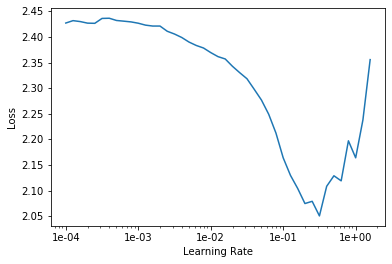

In [20]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(500, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,1.989512,1.847798,0.533409,00:03
1,1.391702,1.244215,0.555111,00:02
2,1.033812,0.987128,0.571959,00:02
3,0.954623,0.944450,0.581668,00:02
4,0.952895,0.936350,0.577099,00:02
5,0.931938,0.930028,0.584809,00:02
6,0.916930,0.924808,0.589663,00:02
7,0.917532,0.921667,0.584238,00:02
8,0.919275,0.923358,0.579669,00:02
9,0.913708,0.921763,0.584523,00:02


In [22]:
predictions_val = learn.get_preds(ds_type=DatasetType.Valid)

In [23]:
predictions_test = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
predictions_val = [np.argmax(i.numpy()) for i in predictions_val[0]]
predictions_test = [np.argmax(i.numpy()) for i in predictions_test[0]]

In [0]:
sub1 = pd.DataFrame(np.column_stack([df_2['TARGET'], predictions_val]), columns = ['Actual', 'Predicted'])
sub1.to_csv('data/multiclass_fastaitabular_insample.csv', index = False)

In [0]:
sub2 = pd.DataFrame(np.column_stack([df_test['class'], predictions_test]), columns = ['Actual', 'Predicted'])
sub2.to_csv('data/multiclass_fastaitabular_outofsample.csv', index = False)